# Introduction to Machine Learning 1

General machine learning work flow:
1. Choose a class of model
2. Choose model hyperparameters
3. Fit the model to the training data ("training")
4. Use the model to predict labels for new data
    - If labels are known (test data, aka 'gold' data), evaluate the performance. 

### Three types of ML:
https://jakevdp.github.io/PythonDataScienceHandbook/05.01-what-is-machine-learning.html

1. Regression: predicting continuous values
2. Classification: predicting discrete labels
3. Clustering: inferring labels on unlabeled data

In [1]:
# Turns on/off pretty printing 
%pprint

# Every returned Out[] is displayed, not just the last one. 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Pretty printing has been turned OFF


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn               # sklearn is the ML package we will use
import seaborn as sns        # seaborn graphical package

## Regression: predicting continuous labels
- Given years of experience (2 years, 10 years), predict the salary (50K? 90K?) 
- Both parameters are continuous numerical values --> regression
- We'll load CSV files directly from a web address. (Yes we can do that!)  

In [3]:
# CSV file found on 
# https://github.com/csjcode/course-machinelearning-az/blob/master/Machine-Learning-A-Z/Part%202%20-%20Regression/Section%204%20-%20Simple%20Linear%20Regression/Salary_Data.csv
# CSV files on GitHub are rendered. Click on "Raw" to get to the raw file. 
# This salary data has cleaner correlation. 
url = "https://raw.githubusercontent.com/csjcode/course-machinelearning-az/master/Machine-Learning-A-Z/Part%202%20-%20Regression/Section%204%20-%20Simple%20Linear%20Regression/Salary_Data.csv"
dataset = pd.read_csv(url)
dataset.columns = ['years_experience', 'salary']

# https://github.com/bokeh/bokeh/blob/master/examples/app/export_csv/salary_data.csv
# This salary data has more variability. 
# url = "https://raw.githubusercontent.com/bokeh/bokeh/master/examples/app/export_csv/salary_data.csv"
# dataset = pd.read_csv(url)

In [4]:
dataset.info()
dataset.head()
dataset.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
years_experience    30 non-null float64
salary              30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


,years_experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


,years_experience,salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


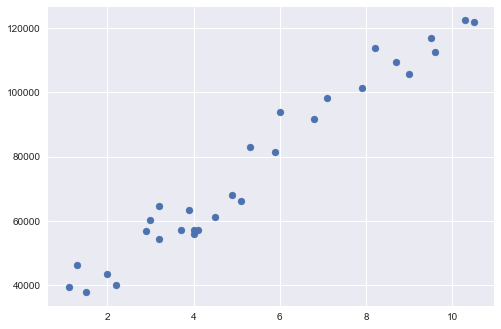

In [5]:
plt.scatter(dataset['years_experience'], dataset['salary'])
plt.show()

### Preparing data for machine learning. 
Need to create:
- Input data, which we will call X. 1+ columns of data points ("features"). 
    - We have only 1 "feature", however, which is years of experience.  
- Target data, which we will call y. A series of data points. 
    - Target is salary dollar amount. 

In [6]:
x = dataset['years_experience']    # series: lower-case x
X = dataset[['years_experience']]  # dataframe with only one column. Uppercase X. 
y = dataset['salary']              # series

In [7]:
x.head()              # Won't be using these, just for illustration
X.head()         # input feature(s)
y.head()         # output target values

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: years_experience, dtype: float64

,years_experience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: salary, dtype: float64

In [8]:
# sklearn provides a function for splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [9]:
len(X_train)
len(X_test)

20

10

In [10]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [12]:
X_test[:5]    # test set, years of expereince
y_test[:5]    # test set, real salaries
y_pred[:5]    # salaries predicted by regressor
                 # <-- hopefully not too far away from real numbers! 

,years_experience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5


2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
Name: salary, dtype: float64

array([  40835.10590871,  123079.39940819,   65134.55626083,
         63265.36777221,  115602.64545369])

### Plotting data and prediction
1. On training set
2. On test set

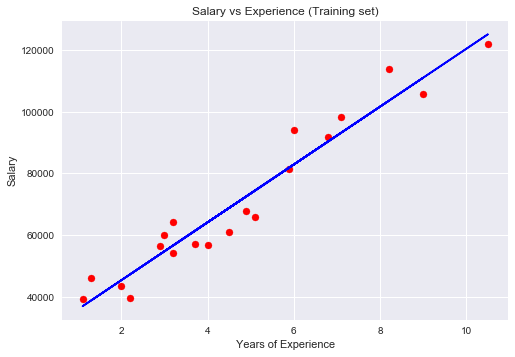

In [13]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

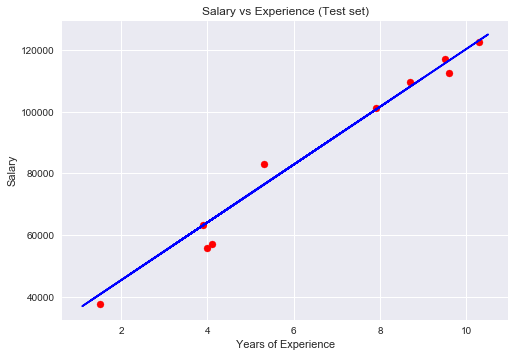

In [14]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [15]:
# How about someone with just 0.5 year of experience? How about 15? 
newdf = pd.DataFrame({'years_experience':[0.5, 15]})
newdf
regressor.predict(newdf)

,years_experience
0,0.5
1,15.0


array([  31489.16346559,  167005.32889087])

## Classification: predicting discrete labels

- Textbook example using sklearn's pre-loaded data set. 
- For detailed explanation, see the textbook section:
 https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html
- Given a short text, can we identify topic labels? 

In [16]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

In [40]:
dir(data)
type(data)

['DESCR', 'data', 'description', 'filenames', 'target', 'target_names']

<class 'sklearn.datasets.base.Bunch'>

In [17]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [18]:
type(train)

<class 'sklearn.datasets.base.Bunch'>

In [19]:
dir(train)

['DESCR', 'data', 'description', 'filenames', 'target', 'target_names']

In [20]:
train.data[5]

"From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)\nSubject: Federal Hearing\nOriginator: dmcgee@uluhe\nOrganization: School of Ocean and Earth Science and Technology\nDistribution: usa\nLines: 10\n\n\nFact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the\nuse of the bible reading and prayer in public schools 15 years ago is now\ngoing to appear before the FCC with a petition to stop the reading of the\nGospel on the airways of America.  And she is also campaigning to remove\nChristmas programs, songs, etc from the public schools.  If it is true\nthen mail to Federal Communications Commission 1919 H Street Washington DC\n20054 expressing your opposition to her request.  Reference Petition number\n\n2493.\n"

In [21]:
train.target[5]

3

In [22]:
train.target_names

['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']

In [41]:
len(train.data)
len(test.data)

2153

1432

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [25]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_i...   vocabulary=None)), ('multinomialnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [26]:
type(labels)
labels[:10]

<class 'numpy.ndarray'>

array([2, 0, 1, 0, 1, 2, 1, 1, 0, 1], dtype=int64)

In [27]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)

In [28]:
mat

array([[344,  13,  32,   0],
       [  6, 364,  24,   0],
       [  1,   5, 392,   0],
       [  4,  12, 187,  48]])

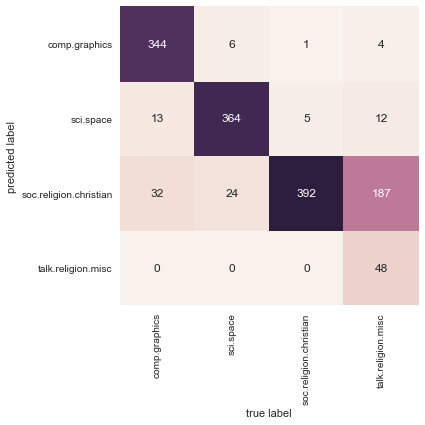

In [29]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [30]:
tests = ['sending a payload to the ISS', 'I met Santa Claus once']
preds = model.predict(tests)
print(preds)

[1 2]


In [31]:
print(train.target_names[1])
print(train.target_names[2])

sci.space
soc.religion.christian


## Under the hood with CounterVectorizer and TF-IDF
`TfidfVectorizer()` actually takes care of multiple steps:
- Tokenizes text and gets rid of stop words and punctuation
- Builds a token count vector
- Converts raw token count into TF-IDF (Term Frequency - Inverse Document Frequency)

Textbook section on TF-IDF: https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html#Text-Features

Better explanation here: http://www.tfidf.com/

In [32]:
# import CountVectorizer and NLTK 
from sklearn.feature_extraction.text import CountVectorizer
import nltk

In [33]:
sents = ['A rose is a rose is a rose is a rose.',
         'Oh, what a fine day it is.',
        "It ain't over till it's over, I tell you!!"]

In [34]:
# Initialize a CoutVectorizer to use NLTK's tokenizer instead of its 
# default one (which ignores punctuation and stopwords). 
# Minimum document frequency set to 1, but with larger corpora you can set it to a higher number.  
foovec = CountVectorizer(min_df=1, tokenizer=nltk.word_tokenize)

In [35]:
# sents turned into sparse vector of word frequency counts
sents_counts = foovec.fit_transform(sents)
# foovec now contains vocab dictionary which maps unique words to indexes
foovec.vocabulary_

{'a': 4, 'rose': 14, 'is': 9, '.': 3, 'oh': 12, ',': 2, 'what': 17, 'fine': 7, 'day': 6, 'it': 10, 'ai': 5, "n't": 11, 'over': 13, 'till': 16, "'s": 1, 'i': 8, 'tell': 15, 'you': 18, '!': 0}

In [36]:
# sents_counts has a dimension of 3 (document count) by 19 (# of unique words)
sents_counts.shape

(3, 19)

In [37]:
# this vector is small enough to view in full! 
sents_counts.toarray()

array([[0, 0, 0, 1, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0],
       [2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1]], dtype=int64)

In [38]:
# Convert raw frequency counts into TF-IDF (Term Frequency -- Inverse Document Frequency) values
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
sents_tfidf = tfidf_transformer.fit_transform(sents_counts)

In [39]:
# TF-IDF values
# raw counts have been normalized against document length, 
# terms that are found across many docs are weighted down
sents_tfidf.toarray()

array([[ 0.        ,  0.        ,  0.        ,  0.13650997,  0.54603988,
         0.        ,  0.        ,  0.        ,  0.        ,  0.40952991,
         0.        ,  0.        ,  0.        ,  0.        ,  0.71797683,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.28969526,  0.28969526,  0.28969526,
         0.        ,  0.38091445,  0.38091445,  0.        ,  0.28969526,
         0.28969526,  0.        ,  0.38091445,  0.        ,  0.        ,
         0.        ,  0.        ,  0.38091445,  0.        ],
       [ 0.47282517,  0.23641258,  0.17979786,  0.        ,  0.        ,
         0.23641258,  0.        ,  0.        ,  0.23641258,  0.        ,
         0.35959573,  0.23641258,  0.        ,  0.47282517,  0.        ,
         0.23641258,  0.23641258,  0.        ,  0.23641258]])